INSTRUCTIONS: Using the same dataset we used for k-NN and Logistic Regression, the Social_Network_Ads.csv (see supplementary material at the end of this course pack), build a machine learning model using the Naive Bayes classifier. Explore the scikit - learn API to find the Naive Bayes library.

# Importing the necessary packages

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
#determine the input and output set
X = dataset.iloc[:, :-1]
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [4]:
y = dataset.iloc[:, -1].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


# Split the dataset

In [5]:
#splitting of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling

In [6]:
#initialize the standard scaler
sc = StandardScaler()

#fit and transform the training and test sets
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the model for Naive Bayes

In [7]:
#instantiate the model
clf = GaussianNB()

#fit the input and output training sets to the model
clf.fit(X_train, y_train)

GaussianNB()

In [9]:
#create a partial fit based on the training sets
clf_pf = GaussianNB()
clf_pf.partial_fit(X_train, y_train, np.unique(y))

GaussianNB()

# Predicting with the given data

In [8]:
#predict the 30 year old man with a salary of 87 000
print(clf.predict([[30, 87000]]))

[1]


In [23]:
#do a partial fit prediction on the 30 year old man with a salary of 87 000
print(clf_pf.predict([[30, 87000]]))

[1]


# Checking the accuracy

In [28]:
#check the accuracy
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  3]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80

0.9125


In [29]:
#check the accuracy of the partial fit
clf_pf.score(X_test, y_test)

0.9125

CONCLUSION of NAIVE BAYES: The 30 year old man with the salary of $87 000 has been predicted to purchase the product.

# Creating the model for Logistic Regression

In [16]:
#create model 
logreg = LogisticRegression(random_state = 0).fit(X_train, y_train)

#predict
print(logreg.predict([[30, 87000]]))

[1]


In [17]:
#check the accuracy
logreg.score(X_test, y_test)

0.925

CONCLUSION of Logistic Regression: It has been predicted that the said customer will purchase the product.

# Creating the model for k-NN

In [18]:
#create model
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [19]:
print(knn.predict([[30, 87000]]))

[1]


In [20]:
knn.score(X_test, y_test)

0.95

# Visualization of Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


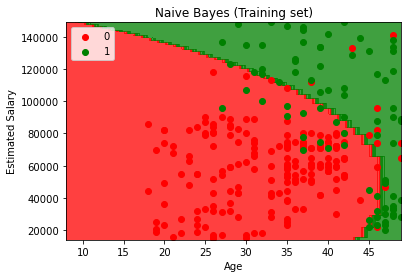

In [21]:
#inverse the transformed training set
X_set, y_set = sc.inverse_transform(X_train), y_train

#create the plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() - 10, step = 1), 
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() - 1000, step = 1))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#plot the values 
for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#add the title, labels, and legends
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


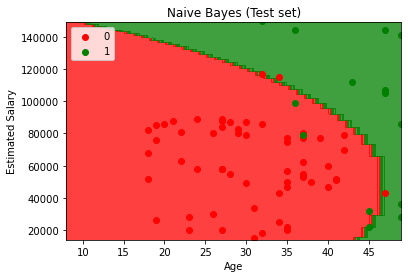

In [22]:
#inverse the transformed training set
X_set, y_set = sc.inverse_transform(X_test), y_test

#create the plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() - 10, step = 1), 
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() - 1000, step = 1))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#plot the values 
for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#add the title, labels, and legends
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()